Edgar Munoz

AAI 510 Assignment 1.1 

Selecting 10 Home Credit Default Risk features using EDA

In [1]:
# importing libraries
import numpy as np # may not require during EDA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Application Training dataset
train_df = pd.read_csv('/Users/macbookair/Desktop/AAI 510 ML/Module 1/home-credit-default-risk/application_train.csv')
train_df.info(1)
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Application Testing dataset
test_df = pd.read_csv('/Users/macbookair/Desktop/AAI 510 ML/Module 1/home-credit-default-risk/application_test.csv')
test_df.info(1)
test_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

Descriptive Statistics

In [3]:
# Describing numerical (not object) values in train data set
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


FINDING DATA TYPES

In [4]:
# dtypes in train data (objects = unique classes)
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

FINDING MISSING (NULL) VALUES

In [5]:
# Checking data sets for missing (null) values
train_df.isnull().sum()
test_df.isnull().sum()

print('Training null values:', train_df.isnull().sum().sum())
print('Testing null values:', test_df.isnull().sum().sum())

Training null values: 9152465
Testing null values: 1404419



FINDING DUPLICATE ENTRIES

In [6]:
# Checking data for duplicate entries
train_duplicated_values = train_df.duplicated().value_counts()
train_duplicated_sum = train_df.duplicated().sum()
print('Duplicate values (True/False):\n')
print(train_duplicated_values)
print()
print('Sum of duplicate entries:', train_duplicated_sum)

Duplicate values (True/False):

False    307511
dtype: int64

Sum of duplicate entries: 0



TARGET VALUE COUNTS

In [7]:
# Target value counts
print('Target value counts:\n') 
print(train_df['TARGET'].value_counts())
print()
print('Total Target values:', train_df['TARGET'].value_counts().sum())

Target value counts:

0    282686
1     24825
Name: TARGET, dtype: int64

Total Target values: 307511


<AxesSubplot:xlabel='TARGET', ylabel='count'>

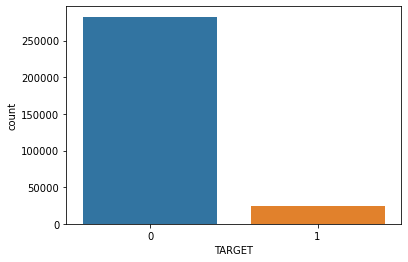

In [8]:
# Visualization on "TARGET" variable via countplot
sns.countplot(data = train_df, x='TARGET')

* Target values of "1" equate to 8.07% of all target values.

FINDING DATA TYPES

In [9]:
# dtypes in train data (object = unique classes)
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

* 16 unique features exist in the train data set

In [10]:
# Unique features (categorical object)
unique_features = pd.DataFrame(train_df.select_dtypes('object').nunique()).reset_index()
print(unique_features)

                         index   0
0           NAME_CONTRACT_TYPE   2
1                  CODE_GENDER   3
2                 FLAG_OWN_CAR   2
3              FLAG_OWN_REALTY   2
4              NAME_TYPE_SUITE   7
5             NAME_INCOME_TYPE   8
6          NAME_EDUCATION_TYPE   5
7           NAME_FAMILY_STATUS   6
8            NAME_HOUSING_TYPE   6
9              OCCUPATION_TYPE  18
10  WEEKDAY_APPR_PROCESS_START   7
11           ORGANIZATION_TYPE  58
12          FONDKAPREMONT_MODE   4
13              HOUSETYPE_MODE   3
14          WALLSMATERIAL_MODE   7
15         EMERGENCYSTATE_MODE   2


In [11]:
# Unique features data
for index in unique_features:
    print(unique_features[index].value_counts(), '\n')

ORGANIZATION_TYPE             1
WALLSMATERIAL_MODE            1
NAME_TYPE_SUITE               1
FONDKAPREMONT_MODE            1
CODE_GENDER                   1
OCCUPATION_TYPE               1
NAME_HOUSING_TYPE             1
WEEKDAY_APPR_PROCESS_START    1
NAME_CONTRACT_TYPE            1
NAME_EDUCATION_TYPE           1
NAME_FAMILY_STATUS            1
HOUSETYPE_MODE                1
FLAG_OWN_REALTY               1
NAME_INCOME_TYPE              1
EMERGENCYSTATE_MODE           1
FLAG_OWN_CAR                  1
Name: index, dtype: int64 

2     4
7     3
3     2
6     2
4     1
5     1
8     1
18    1
58    1
Name: 0, dtype: int64 



Two features contain XNA values:
* CODE_GENDER: XNA (4)
* ORGANIZATION_TYPE: XNA (55374)

In [12]:
print(train_df['CODE_GENDER'].value_counts())
print(test_df['CODE_GENDER'].value_counts())


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


* CODE_GENDER contains FOUR XNA values in train data set, ZERO in test data set

In [13]:
print(train_df['ORGANIZATION_TYPE'].value_counts())
print()
print(test_df['ORGANIZATION_TYPE'].value_counts())

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

* ORGANIZATION_TYPE contains 55374 XNA values in train data set and 9274 XNA values in test data set.

# 10 PLOTS OF CONTINOUS VARIABLES/FEATURES 

FEATURE: DAYS_BIRTH

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


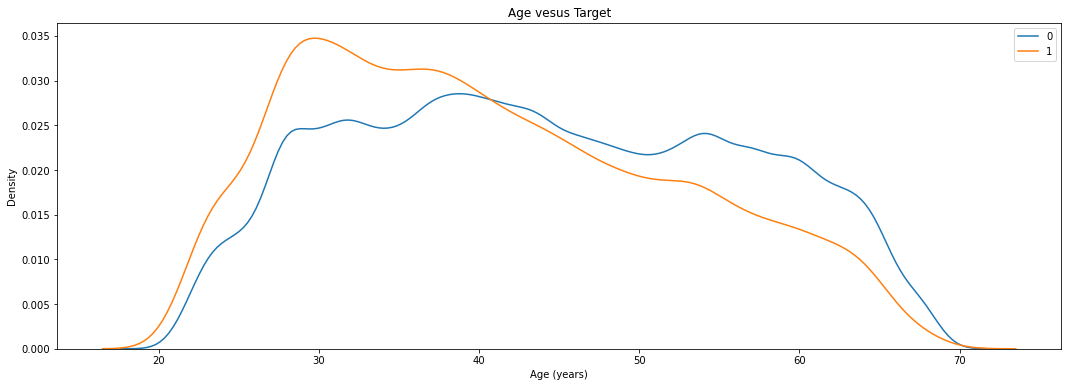

In [14]:
# Converting DAYS_BIRTH to positive values & into YEARS_AGE

# extract dataframe with DAYS_BIRTH
age_df = train_df[train_df['DAYS_BIRTH']!=0]
age_df['YEARS_AGE'] = np.abs(age_df['DAYS_BIRTH'])/(365)

# Plotting Age
plt.figure(figsize=(18,6))
sns.distplot(age_df[age_df['TARGET']==0]['YEARS_AGE'], hist=False, label='0')
sns.distplot(age_df[age_df['TARGET']==1]['YEARS_AGE'], hist=False, label='1')
plt.title('Age vesus Target')
plt.xlabel('Age (years)')
plt.legend()


* Plot is important as it reveals a distribution convergance and divergance between those unable to repay home loans and those who can in respect to age. Those below age 40 are more unlikely to pay a home loan versus those above age 40. In addition, ability to pay a home loan converges around age 70.

FEATURE: CNT_CHILDREN

TARGET             0      1
CNT_CHILDREN               
0             198762  16609
1              55665   5454
2              24416   2333
3               3359    358
4                374     55
5                 77      7
6                 15      6
7                  7      0
8                  2      0
9                  0      2
10                 2      0
11                 0      1
12                 2      0
14                 3      0
19                 2      0


Text(0, 0.5, 'Frequency')

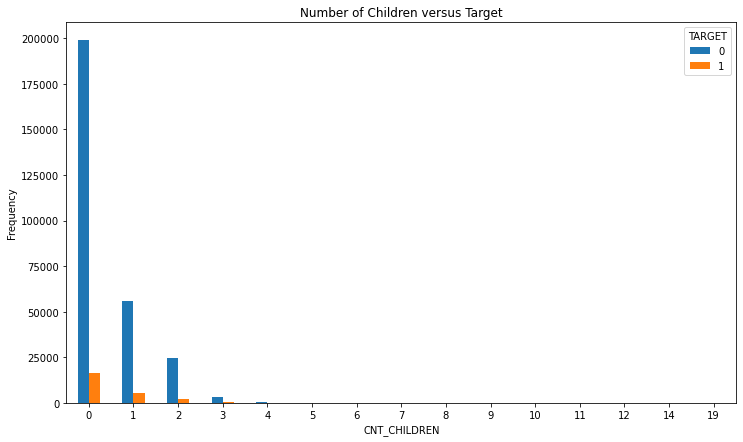

In [15]:
# Grouped bar chart between CNT_CHILDREN and TARGET
CrosstabResult_2=pd.crosstab(index=train_df['CNT_CHILDREN'], columns=train_df['TARGET'])
print(CrosstabResult_2)
CrosstabResult_2.plot.bar(figsize=(12,7), rot=0)
plt.title('Number of Children versus Target')
plt.ylabel('Frequency')

* The higher the Children Count, the less likely the customer is given a home loan. Also, more customers are approved for a home loan the less children they have. 

FEATURE: AMT_INCOME_TOTAL

<ipython-input-16-3587502512a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df['AMT_INCOME_TOTAL'] = income_df['AMT_INCOME_TOTAL']/(10000)
/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a 

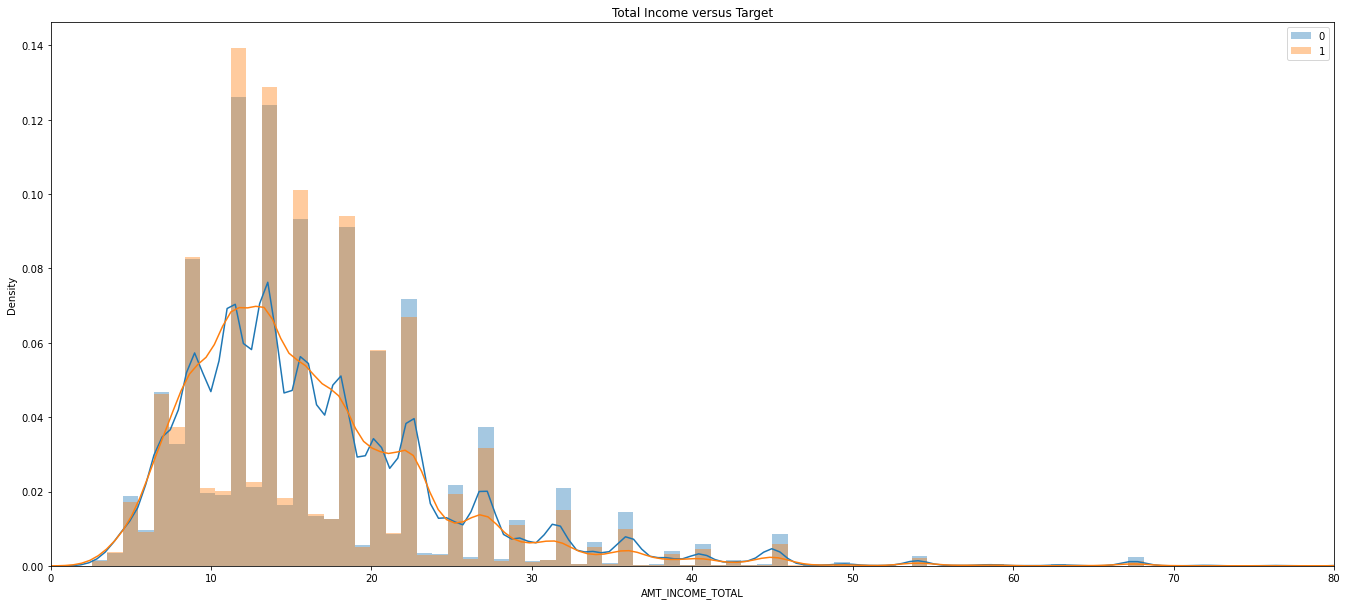

In [16]:
# Plotting AMT_INCOME_TOTAL below $1,000,000 & dividing AMT_INCOME_TOTAL by 10,000
income_df = train_df[train_df['AMT_INCOME_TOTAL']<1000000.0]
income_df['AMT_INCOME_TOTAL'] = income_df['AMT_INCOME_TOTAL']/(10000)

# Plotting 
plt.figure(figsize=(23,10))
sns.distplot(income_df[income_df['TARGET']==0]['AMT_INCOME_TOTAL'], hist=True, bins=100, label='0')
sns.distplot(income_df[income_df['TARGET']==1]['AMT_INCOME_TOTAL'], hist=True, bins=100, label='1')
plt.title('Total Income versus Target')
plt.xlim([0,80])
plt.legend()

* Customers that make less income are unlikely to repay loan and thus are denied a loan. Higher incomes result higher loan approvals. Incomes below 20 are likely to repay a home loan just as likely as not to repay a home loan. 

FEATURE: NAME_EDUCATION_TYPE

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

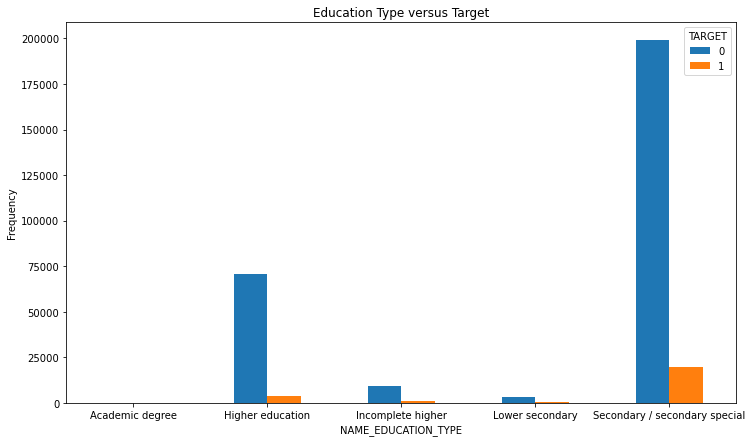

In [17]:
# NAME_EDUCATION_TYPE value counts
print(train_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts())

# Cross tabulation between NAME_EDUCATION_TYPE and TARGET
CrosstabResult_3=pd.crosstab(index=train_df['NAME_EDUCATION_TYPE'], columns=train_df['TARGET'])
CrosstabResult_3.plot.bar(figsize=(12,7), rot=0)
plt.title('Education Type versus Target')
plt.ylabel('Frequency')

* 1.83% of Academic degree borrowers were not likely to repay home loans, while almost 9% of Secondary degree borrowers were not likely to repay home loans.

FEATURE: NAME_FAMILY_STATUS

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          26814
                      1           2961
Married               0         181582
                      1          14850
Separated             0          18150
                      1           1620
Single / not married  0          40987
                      1           4457
Unknown               0              2
Widow                 0          15151
                      1            937
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

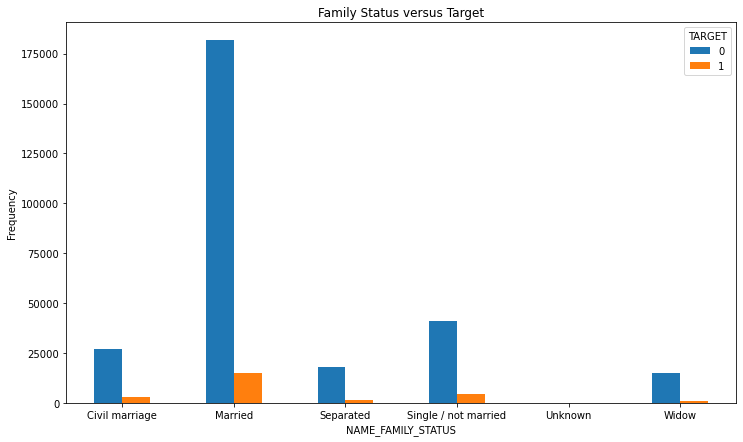

In [18]:
# NAME_FAMILY_STATUS value counts
print(train_df.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts())

# Grouped bar chart between NAME_FAMILY_STATUS and TARGET
CrosstabResult_4=pd.crosstab(index=train_df['NAME_FAMILY_STATUS'], columns=train_df['TARGET'])
CrosstabResult_4.plot.bar(figsize=(12,7), rot=0)
plt.title('Family Status versus Target')
plt.ylabel('Frequency')

* Married apply to home loans more and are likely to repay loan. About 10% of Single/Not Married are unable to pay back home loans. 

FEATURE: NAME_INCOME_TYPE

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

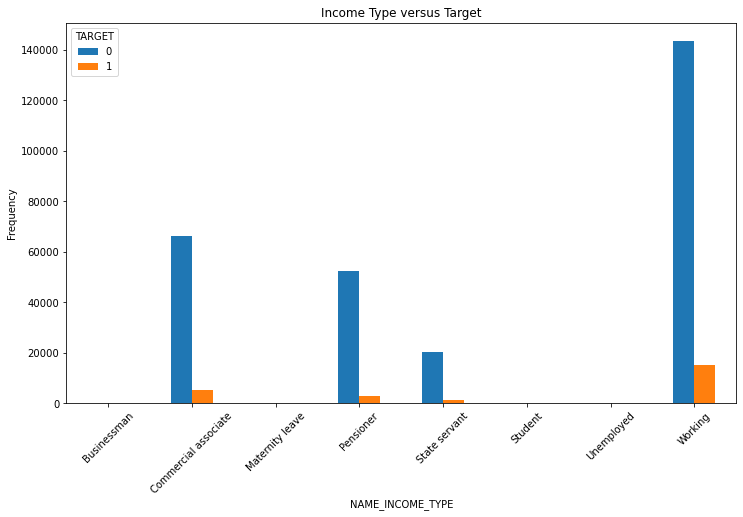

In [19]:
# NAME_INCOME_TYPE value counts
print(train_df.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts())

# Cross tabulation between NAME_INCOME_TYPE and TARGET
CrosstabResult_5=pd.crosstab(index=train_df['NAME_INCOME_TYPE'], columns=train_df['TARGET'])
CrosstabResult_5.plot.bar(figsize=(12,7), rot=45)
plt.title('Income Type versus Target')
plt.ylabel('Frequency')

* Unemployed customers are less likely to repay loans - 36% do not repay. Student and Businessman are more likely to repay home loans. 

FEATURE: AMT_CREDIT

/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


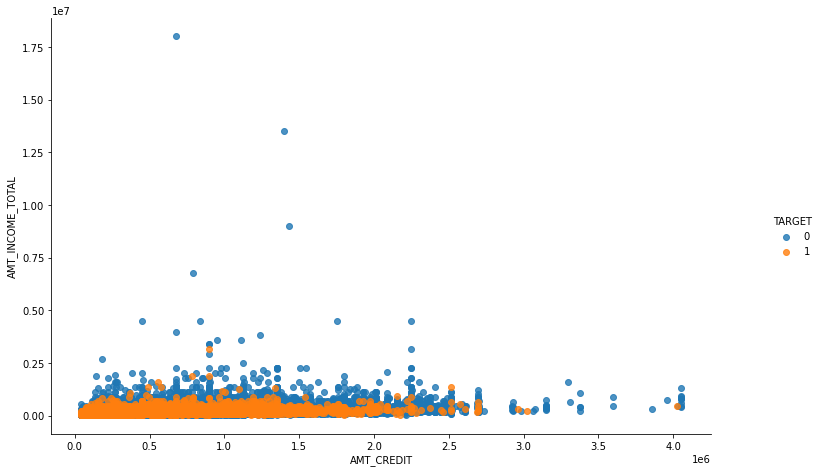

In [20]:
# AMT_CREDIT and AMT_INCOME_TOTAL with respect to TARGET

# Excluding outlier with value 117000000.0
new_income = train_df[train_df['AMT_INCOME_TOTAL']!=117000000.0]

# Plotting AMT_CREDIT with AMT_INCOME_TOTAL
sns.lmplot('AMT_CREDIT', 'AMT_INCOME_TOTAL',  new_income, hue='TARGET', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

* AMT_CREDIT plotted against AMT_INCOME_TOTAL reveals that higher credit amounts are requested by higher income earners, while being able to pay these higher credit amounts. 

FEATURE: NAME_HOUSING_TYPE

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0           1033
                     1             89
House / apartment    0         251596
                     1          21272
Municipal apartment  0          10228
                     1            955
Office apartment     0           2445
                     1            172
Rented apartment     0           4280
                     1            601
With parents         0          13104
                     1           1736
Name: TARGET, dtype: int64


Text(0, 0.5, 'Frequency')

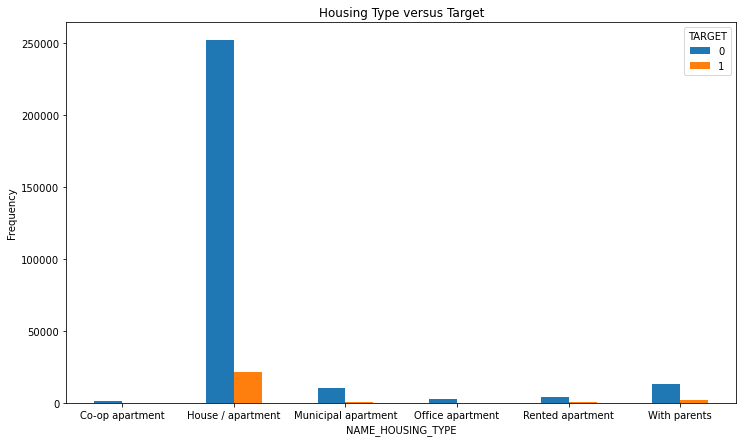

In [21]:
# NAME_HOUSING_TYPE value counts
print(train_df.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts())

# Cross tabulation between NAME_HOUSING_TYPE and TARGET
CrosstabResult_6=pd.crosstab(index=train_df['NAME_HOUSING_TYPE'], columns=train_df['TARGET'])
CrosstabResult_6.plot.bar(figsize=(12,7), rot=0)
plt.title('Housing Type versus Target')
plt.ylabel('Frequency')

* Ability to repay home loan varies among the different categories of housing type for an individual. House/apartment dwellers are likely to apply more for home loans, and while more are approved collectively, a larger number are unlikely to repay home loans relative to all other dweller types combined.

FEATURE: DAYS_EMPLOYED

<ipython-input-22-b7ae32af9453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_employed_df['YEARS_EMPLOYED'] = years_employed_df['DAYS_EMPLOYED']/(-365)
/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/macbookair/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

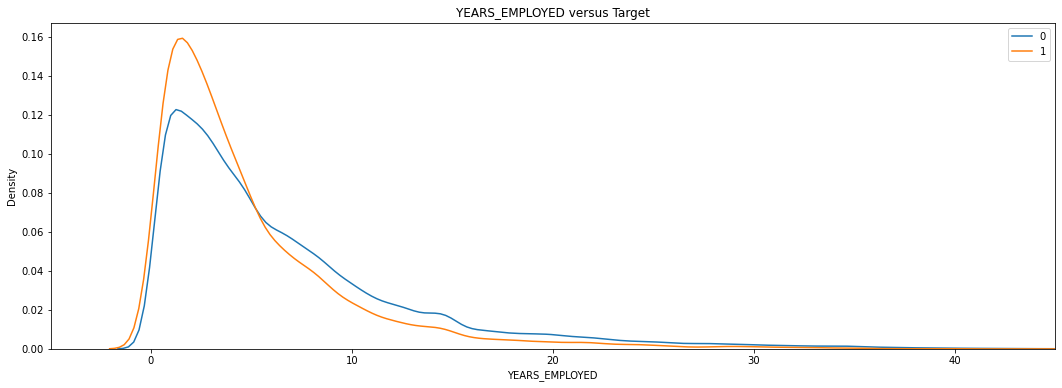

In [22]:
# Converting Days of employment in years of employment & excluding DAYS_EMPLOYED=365243 (1000 years of employment)
years_employed_df = train_df[train_df['DAYS_EMPLOYED']!=365243]
years_employed_df['YEARS_EMPLOYED'] = years_employed_df['DAYS_EMPLOYED']/(-365)

# Plotting Years_Employed 
plt.figure(figsize=(18,6))
sns.distplot(years_employed_df[years_employed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label='0')
sns.distplot(years_employed_df[years_employed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label='1')
plt.title('YEARS_EMPLOYED versus Target')
plt.xlim([-5,45])
plt.legend()

* Borrowers with less than seven years have more trouble repaying a home loan. Afterwards, years_employed diverages, with borrowers over seven of employment having less trouble repaying home loans. Convergance occurs at around 40 years of employment. 

FEATURE: OCCUPATION_TYPE

OCCUPATION_TYPE        TARGET
Accountants            0          9339
                       1           474
Cleaning staff         0          4206
                       1           447
Cooking staff          0          5325
                       1           621
Core staff             0         25832
                       1          1738
Drivers                0         16496
                       1          2107
HR staff               0           527
                       1            36
High skill tech staff  0         10679
                       1           701
IT staff               0           492
                       1            34
Laborers               0         49348
                       1          5838
Low-skill Laborers     0          1734
                       1           359
Managers               0         20043
                       1          1328
Medicine staff         0          7965
                       1           572
Private service staff  0          

Text(0, 0.5, 'Frequency')

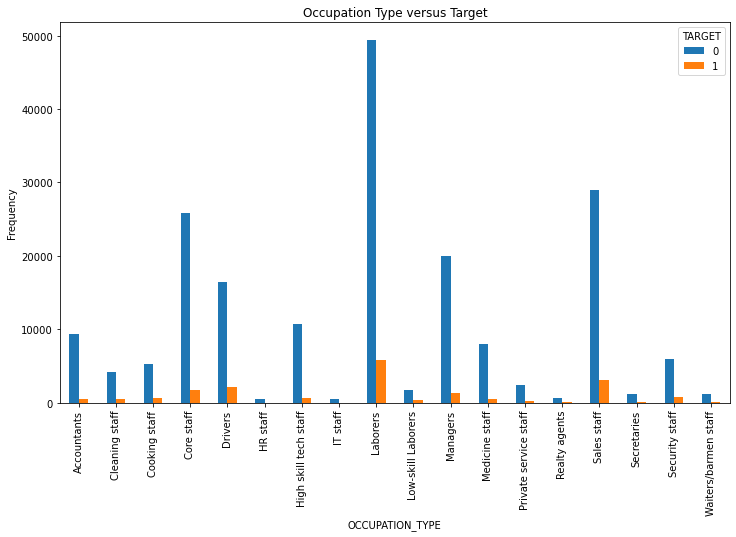

In [23]:
# OCCUPATION_TYPE value counts
print(train_df.groupby('OCCUPATION_TYPE')['TARGET'].value_counts())

# Cross tabulation between OCCUPATION_TYPE and TARGET
CrosstabResult_8=pd.crosstab(index=train_df['OCCUPATION_TYPE'], columns=train_df['TARGET'])
CrosstabResult_8.plot.bar(figsize=(12,7), rot=90)
plt.title('Occupation Type versus Target')
plt.ylabel('Frequency')

* Low-skill Laborers were about three times more likely not to repay a home loan in contrast to a High skill tech staff. Drivers were two times more likely not to repay in comparison to a High skill tech staff. 

##### BOXPLOTS FOR TOP TEN CONTINUOUS FEATURES ABOVE

Text(0.5, 1.0, 'AGE')

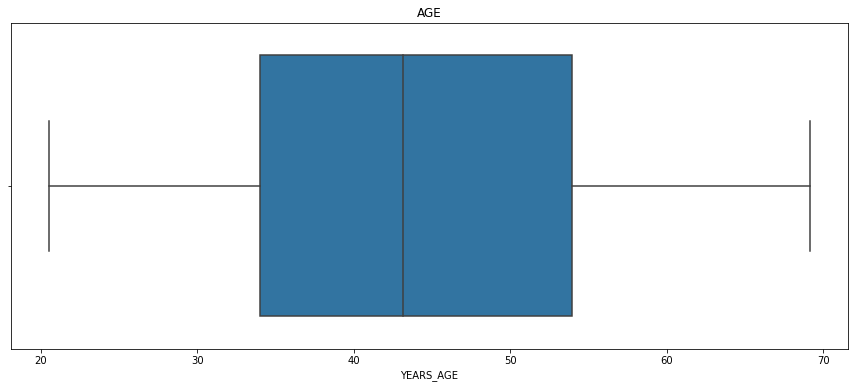

In [24]:
# BOXPLOT YEARS_AGE (Converted from DAYS_BIRTH)
plt.figure(figsize=(15, 6))
sns.boxplot(data=age_df, x='YEARS_AGE')
plt.title('AGE')

Text(0.5, 1.0, 'Children Count')

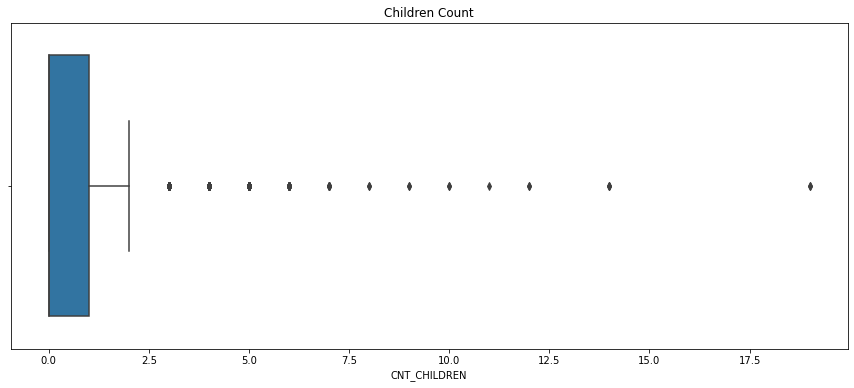

In [25]:
# BOXPLOT CNT_CHILDREN
plt.figure(figsize=(15, 6))
sns.boxplot(data=train_df, x='CNT_CHILDREN')
plt.title('Children Count')

Text(0.5, 1.0, 'Total Income')

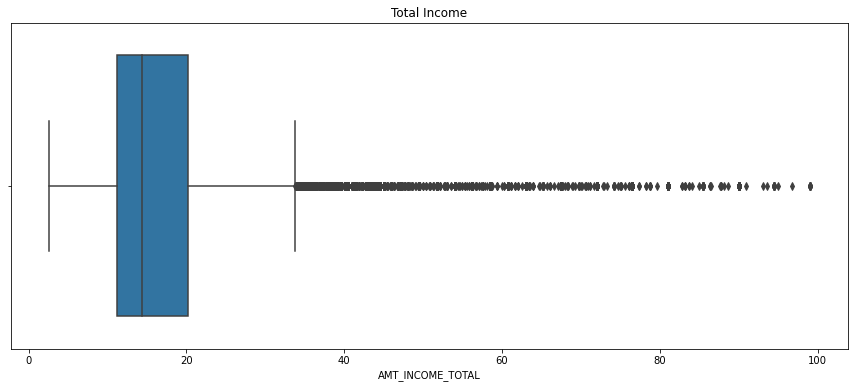

In [26]:
# BOXPLOT AMT_INCOME_TOTAL (From income_df)
plt.figure(figsize=(15, 6))
sns.boxplot(data=income_df, x='AMT_INCOME_TOTAL')
plt.title('Total Income')

Text(0.5, 1.0, 'Credit Amount')

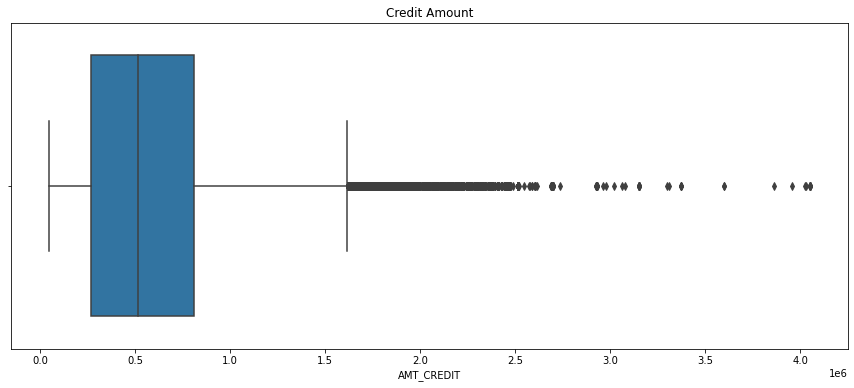

In [27]:
# BOXPLOT AMT_CREDIT
plt.figure(figsize=(15, 6))
sns.boxplot(data=train_df, x='AMT_CREDIT')
plt.title('Credit Amount')

Text(0.5, 1.0, 'Years Employed')

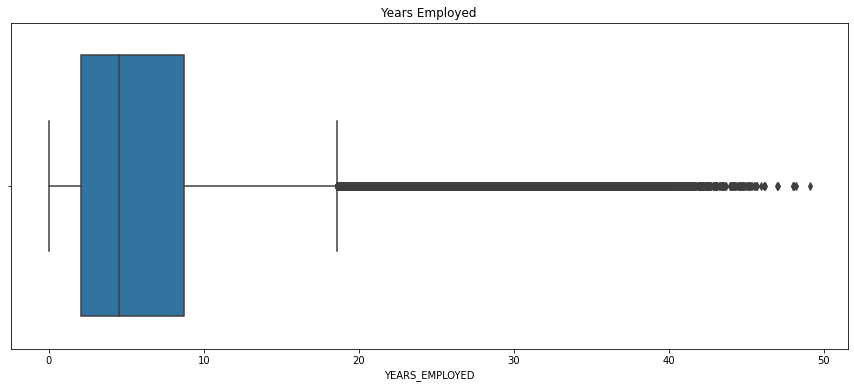

In [28]:
# BOXPLOT YEARS_EMPLOYED (Converted from DAYS_EMPLOYED)
plt.figure(figsize=(15, 6))
sns.boxplot(data=years_employed_df, x='YEARS_EMPLOYED') 
plt.title('Years Employed')

###### THE TEN FEATURES ARE: DAYS_BIRTH, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_INCOME_TYPE, AMT_CREDIT, NAME_HOUSING_TYPE, DAYS_EMPLOYED, OCCUPATION_TYPE